In [11]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as po
import math
from sklearn import metrics
from sklearn.metrics import confusion_matrix
num_points=0.0

# Binary Classifier Evaluator

## File I/O

In [12]:
#pickling example
import pickle
predictions=po.DataFrame({"guesses":[0,1,0,1,0,1,0,1],"prob_neg":[.75,.15,.63,.20,.75,.15,.63,.20],"prob_pos":[.25,.85,.27,.80,.25,.85,.27,.80]})
prediction_pickle_path = 'prediction_pickle.pkl'

from google.colab import files
# Create an variable to pickle and open it in write mode
prediction_pickle = open(prediction_pickle_path, 'wb')
pickle.dump(predictions, prediction_pickle)
files.download(prediction_pickle_path)
prediction_pickle.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#upload test labels and team's predictions
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Group1_Initial_Submission.pkl to Group1_Initial_Submission.pkl
User uploaded file "Group1_Initial_Submission.pkl" with length 24186 bytes


In [42]:
#Should be probabilities
Group_Predictions=po.DataFrame(po.read_pickle('Group1_Initial_Submission.pkl')) #from student submission
Group_Predictions=Group_Predictions.apply(po.to_numeric)
Group_Predictions.values

array([[0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       ...,
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ]])

In [28]:
test_data=po.read_pickle("hypothyroid_test_data_pickle.pkl")

In [30]:
all_test_labels=po.read_pickle("hypothyroid_binary_test_labels.pkl") #from GitHub
all_test_labels["class"]=po.get_dummies(all_test_labels["class"],drop_first=True)
all_test_labels.head(20)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [31]:
#for if the group omitted rows
required_testing_labels=po.DataFrame()
for i in Group_Predictions.index:
  required_testing_labels=required_testing_labels.append(all_test_labels.iloc[i])
len(required_testing_labels)

972

## Binary Confusion Matrix

In [47]:
# This is exactly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- let us know if you get to the multi-class case
def cm_metric(y_true,y_val_predict):
    #print(type(y_prob))
    # predict the class with the greatest probability
    #y_val_predict = [np.argmax(y) for y in y_prob]
    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_val_predict)
    print(cm)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -4], [-4, 1]]))))

#cm_metric(required_testing_labels,Group_Predictions.values)

num_points+=cm_metric(required_testing_labels,Group_Predictions.values[:,0]) #max is 2

[[881  20]
 [  8  63]]


In [36]:
####
Group_Predictions.values[:,0]
fpr, tpr, threshold = metrics.roc_curve(required_testing_labels, Group_Predictions.values[:,0])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9325631926966907

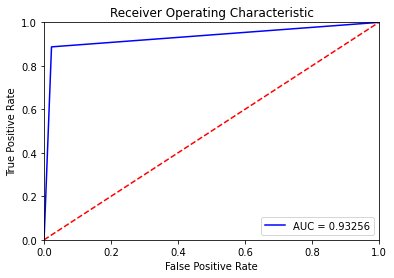

[[881  20]
 [  8  63]]
1.3256319269669068
AUC:  0.9325631926966907


In [48]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(cm_metric(required_testing_labels,Group_Predictions.values[:,0]))
print("AUC: ",roc_auc)
#print("Score: ",str(num_points)) #MAX score: (2+1)=3 points

# Multiclass Classifier Evaluator

In [ ]:
#upload test labels and team's predictions
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#reading in the Group_Predictions as a data frame
Group_Predictions=po.DataFrame(po.read_pickle('claws_week1_attempt2_multi.pkl')) #from student submission
Group_Predictions=Group_Predictions.apply(po.to_numeric)
Group_Predictions.head(10)

In [ ]:
all_test_labels=po.read_pickle("hypothyroid_multiclass_test_labels.pkl") #from github
print(type(all_test_labels)) #pandas DataFrame

#Fixing the class variables 
all_test_labels['class'] = all_test_labels['class'].replace('negative', 0)                    
all_test_labels['class'] = all_test_labels['class'].replace('compensated hypothyroid', 1)     
all_test_labels['class'] = all_test_labels['class'].replace('primary hypothyroid', 2)        
all_test_labels['class'] = all_test_labels['class'].replace('secondary hypothyroid', 3)            

In [ ]:
#Create a data frame of testing labels that correspond to the indices that the students used (the students may have omitted rows)
required_testing_labels=po.DataFrame()
for i in Group_Predictions.index:
  required_testing_labels=required_testing_labels.append(all_test_labels.iloc[i])

In [ ]:
#check length of the testing labels (make sure it matches the team's length)
print(len(Group_Predictions.values))
print(len(required_testing_labels))

In [ ]:
def cm_metric_complex(y_true,y_prob):
    # predict the class with the greatest probability
    y_val_predict = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_val_predict)
    print(cm)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -1,-2],
                                                 [-4, 2,-1],
                                                 [-8, -4,3]])))) #3 x 3 because 1 class value is so rare

#Argument 1 data type: pandas.DataFrame (of test labels) // Argument 2 data type: numpy.ndarray  (of the team's predictions)
cm_metric_complex(required_testing_labels, Group_Predictions.values)

In [ ]:
#compiling the 1 multiclass class feature into 3 columns (one hot encoding))
#this puts the test labels into a format appropriate for computing the roc_curve function
one_hot_test_labels=po.get_dummies(all_test_labels["class"])
one_hot_test_labels

In [ ]:
#computing AUROC using a macro-type calculation
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
  fpr[i], tpr[i], _ = metrics.roc_curve(one_hot_test_labels.iloc[:, i],Group_Predictions.iloc[:,i]) #compute each pos, fp rate for each class value
  roc_auc[i] = metrics.auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i],label=Group_Predictions.columns[i])
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()

fpr["macro"], tpr["macro"], _ = metrics.roc_curve(one_hot_test_labels.values.ravel(), Group_Predictions.iloc[:,0:3].values.ravel())
roc_auc = metrics.auc(fpr["macro"], tpr["macro"])

roc_auc

0.9987997256515775

In [ ]:
#feedback
print(cm_metric(required_testing_labels,Group_Predictions.values))
print("AUC: ",roc_auc)
print("Score: ",str(num_points))